## Overview on Dataset
The dataset is stored in a CSV file and includes additional columns such as time in hours, date, days of the week, and counts for each vehicle type (CarCount, BikeCount, BusCount, TruckCount). The "Total" column represents the total count of all vehicle types detected within a 15-minute duration.


In [2]:
df = pd.read_csv("Traffic.csv")
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


There is no null values in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


Furthermore, the dataset is balanced by dates and days of the week.

In [4]:
df["Date"].value_counts()

Date
10    96
26    96
8     96
7     96
6     96
5     96
4     96
3     96
2     96
1     96
31    96
30    96
29    96
28    96
27    96
25    96
11    96
24    96
23    96
22    96
21    96
20    96
19    96
18    96
17    96
16    96
15    96
14    96
13    96
12    96
9     96
Name: count, dtype: int64

In [5]:
df["Day of the week"].value_counts()

Day of the week
Tuesday      480
Wednesday    480
Thursday     480
Friday       384
Saturday     384
Sunday       384
Monday       384
Name: count, dtype: int64

## Vehicle Counts

Let's visualise to explore the distribution and quartiles of the data.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

5 Quantiles of the data that we are interested in:

In [7]:
meansOT = ["CarCount", "BikeCount", "BusCount", "TruckCount"]

for mean in meansOT:

    print(mean)
    print(f"Q1, Median, Q3: {np.quantile(df[mean], [0.25, 0.5, 0.75])}")
    print(f"Max and Min: {df[mean].max()} and {df[mean].min()}")
    print(f"Total number of recorded vehicles > 0: {df[mean].loc[df[mean] > 0].sum()}")
    print(f"Total number of counts = 0: {df[mean].loc[df[mean] == 0].count()}")
    print("\n") 



CarCount
Q1, Median, Q3: [ 19.  64. 107.]
Max and Min: 180 and 6
Total number of recorded vehicles > 0: 204441
Total number of counts = 0: 0


BikeCount
Q1, Median, Q3: [ 5. 12. 22.]
Max and Min: 70 and 0
Total number of recorded vehicles > 0: 44394
Total number of counts = 0: 145


BusCount
Q1, Median, Q3: [ 1. 12. 25.]
Max and Min: 50 and 0
Total number of recorded vehicles > 0: 45472
Total number of counts = 0: 437


TruckCount
Q1, Median, Q3: [ 6. 14. 23.]
Max and Min: 40 and 0
Total number of recorded vehicles > 0: 45607
Total number of counts = 0: 119




Histogram plots for the distribution.

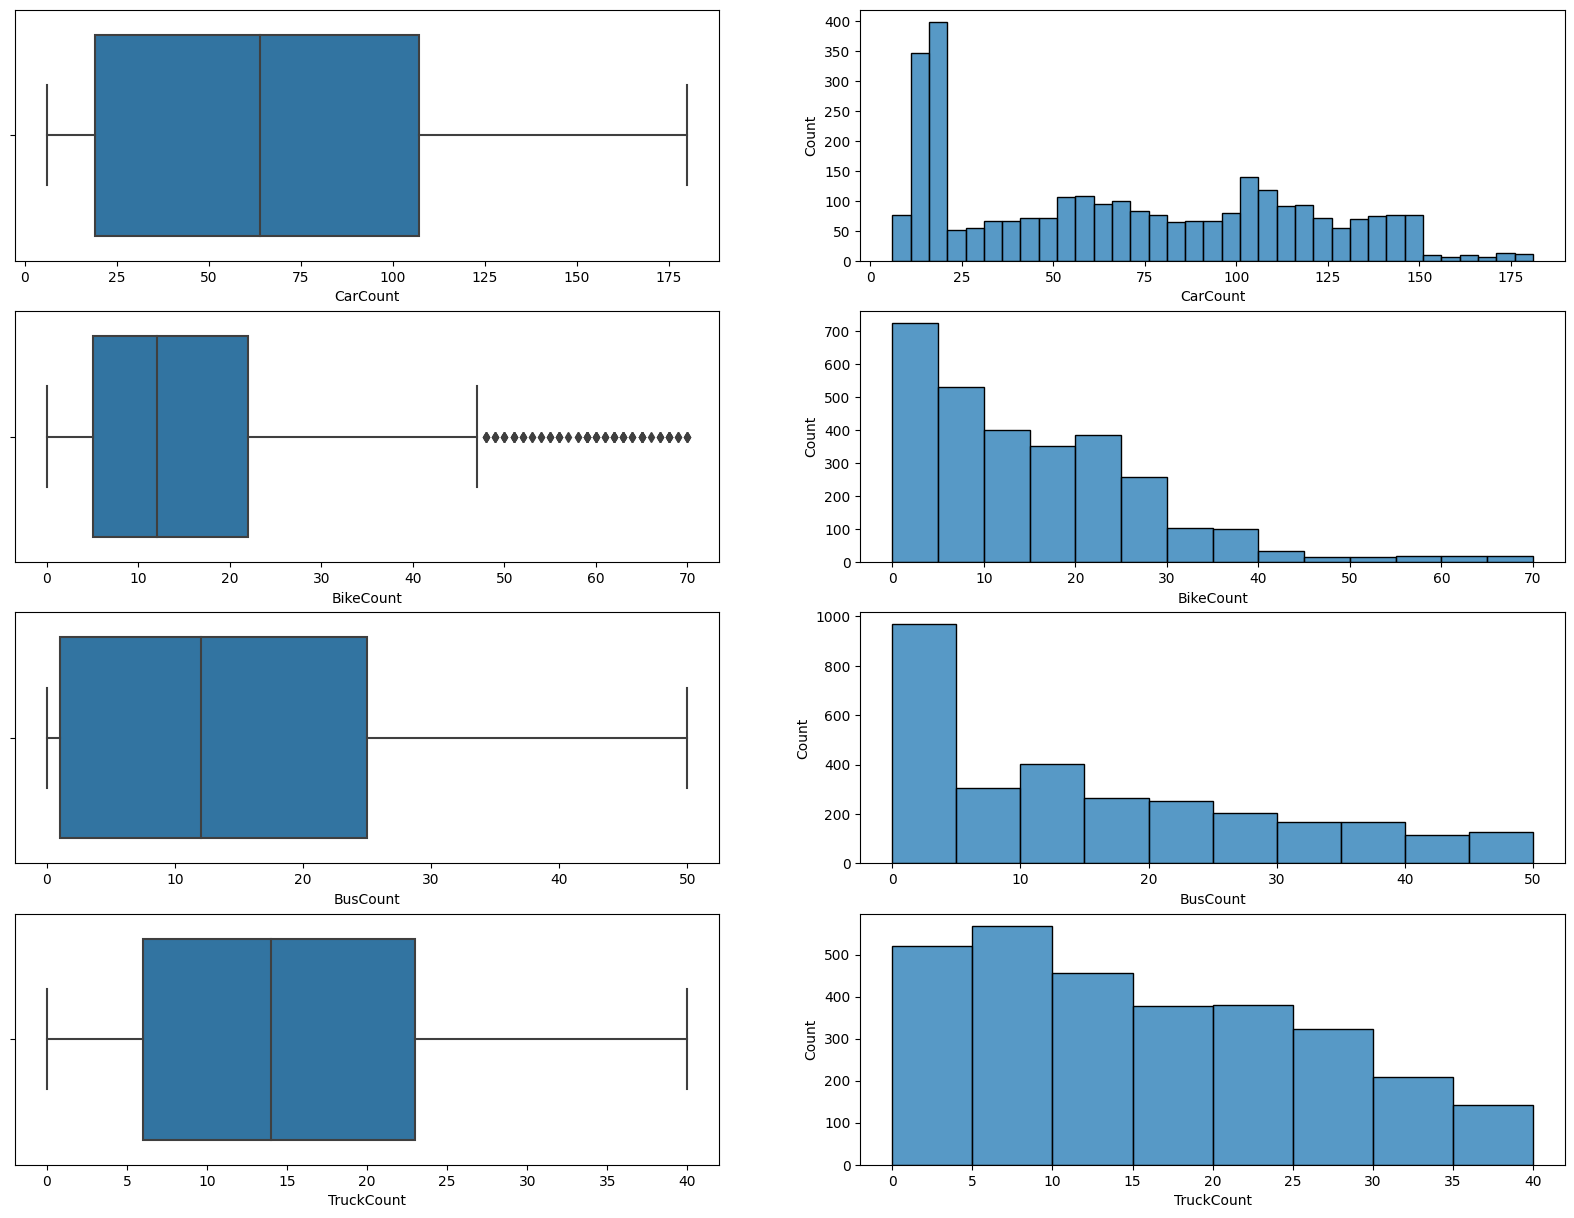

In [8]:
fig,axes = plt.subplots(4,2,figsize=(20,15))
i = 0;
j = 0;
for col in meansOT:
    
    ax = sns.boxplot(x=df[col], ax=axes[i][j])
    j += 1
    ax = sns.histplot(df, x=col,binwidth = 5,ax=axes[i][j])
    i += 1
    j -= 1
    


 It appears that there were some periods of time when people didn't transport much, which lead to a high number of only 0-10 transportations appearing on the street.

Cars might be the most popular means of transport with more than 200000 vehicles recorded, while other means of transportation had the same popularity



## Relationship

We are going to explore when the traffic was the worst according to some factors.

### Total vs Traffic situation
It seems the total number of transportations on the street might have a strong positive relationship to the traffic situations.

In [9]:
# For sorting based on day of the week and traffic situation
custom_dict = {"Monday": 0, "Tuesday": 1, "Wednesday":2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}

i = 0
for val in df['Traffic Situation'].unique():
    if val == "low":
        custom_dict[val] = 1
    if val == "normal":
        custom_dict[val] = 2
    if val == "high":
        custom_dict[val] = 3
    if val == "heavy":
        custom_dict[val] = 4

Text(0.5, 1.0, 'The number of average total transportations for each category of traffic situation')

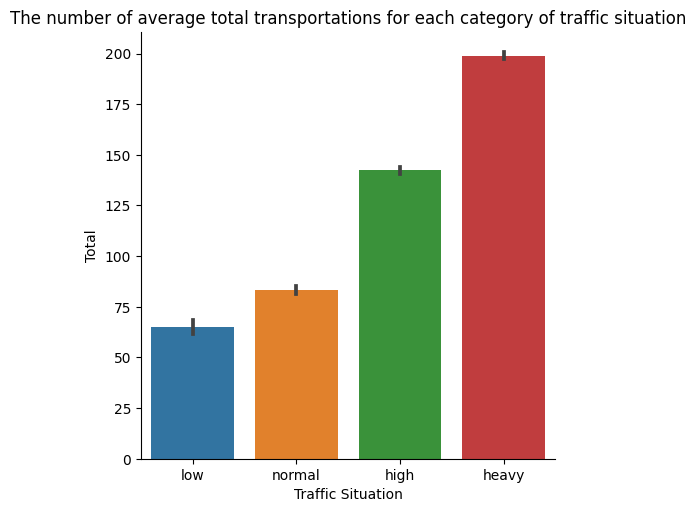

In [10]:
sns.catplot(data=df.copy().sort_values("Traffic Situation", key=lambda x: x.map(custom_dict)), x="Traffic Situation", y="Total", kind="bar")
plt.title("The number of average total transportations for each category of traffic situation")

Clearly, the number of total vehicles when the traffic condition got worse increased significantly.

### Day of the week vs Traffic Situation

In [11]:
grouped_df = df.groupby(["Day of the week", "Traffic Situation"]).sum()[meansOT + ["Total"]]
grouped_df = grouped_df.reset_index(inplace=False)      

grouped_df = grouped_df.sort_values(by=["Day of the week", "Traffic Situation"], key=lambda x: x.map(custom_dict))
grouped_df.head(5)

,Day of the week,Traffic Situation,CarCount,BikeCount,BusCount,TruckCount,Total
5,Monday,low,1551,353,186,289,2379
6,Monday,normal,9543,1831,1870,4389,17633
4,Monday,high,3939,727,1053,1058,6777
3,Monday,heavy,10860,2153,3097,477,16587
21,Tuesday,low,1688,272,186,255,2401


[Text(0.5, 1.0, 'The trend of traffic situation grouped by days of week')]

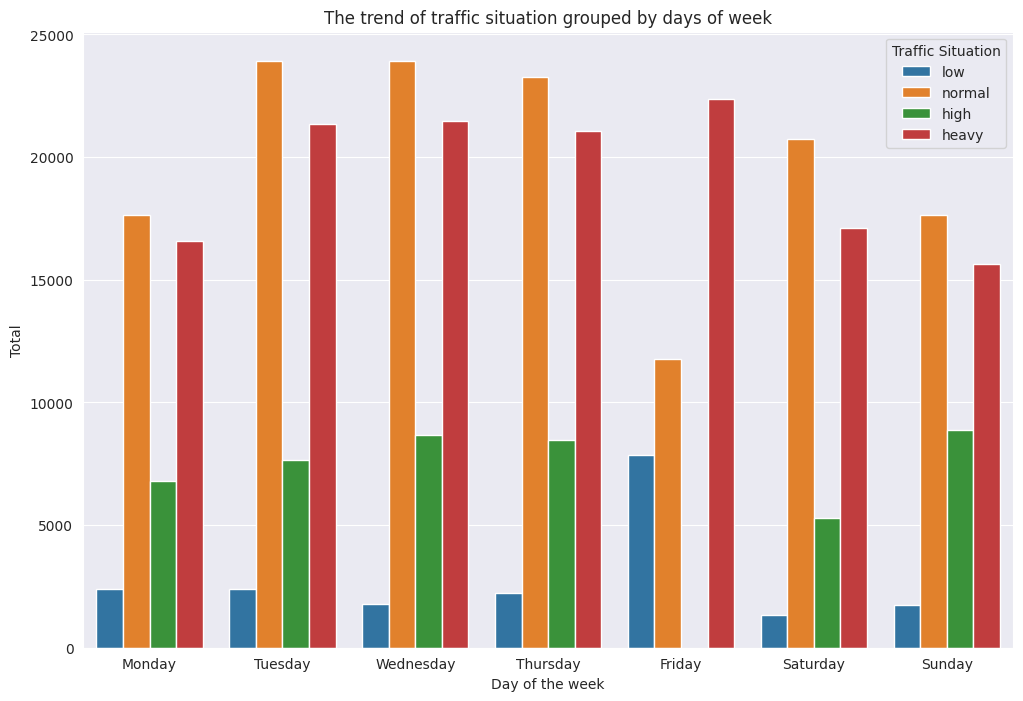

In [12]:
sns.set_style("darkgrid")

fig = plt.subplots(figsize =(12, 8)) 
sns.barplot(data=grouped_df, x="Day of the week", y="Total", hue="Traffic Situation").set( title="The trend of traffic situation grouped by days of week")


 Low and High traffic congestion did't happen frequently.
  
Although Friday had the highest number of heavy traffic condition counted, there was no high traffic situation happening on the day and the traffic tended to be smoother than other days. 

In general, the traffic condition on the weekdays was often heavier than its at the weekends and they are quite the same in the weekdays.

### Time of a day of the week vs Total
For the purpose of visualisation, I will group each hour together and convert it to 24-hour convention.

In [13]:
# Change time to 24-hour convention
df_copy = df.copy()
times = []


for time in df_copy["Time"]:
    d = time.split()
    part = d[0].split(":")
    
    if d[1] == "PM":
        if part[0] != "12":
            part[0] = str(int(part[0]) + 12)
            times.append(":".join(part))
            continue
    
    if d[1] == "AM" and part[0] == "12" and d[0] != "12:00:00":
            part[0] = str("00")
            times.append(":".join(part))
            continue
    
    times.append(d[0])

df_copy["Time"] = times
    
# Sort time
import time
format = '%H:%M:%S'
time_hours = [time.strptime(t, format) for t in df_copy["Time"]]

df_copy["TimeConvert"] = time_hours
df_copy.sort_values(["Day of the week", "TimeConvert"])
grouped_df2 = df_copy.groupby(["Day of the week", "TimeConvert", "Time"]).sum()[meansOT + ["Total"]].sort_values(["Day of the week", "TimeConvert"], key=lambda x: x.map(custom_dict))

In [14]:
# Aggregate to simplify line plots
grouped_df2.reset_index(inplace=True)
grouped_df2

hours = []
# New columns to agg
for time in grouped_df2["Time"]:
    hours.append(int(time.split(":")[0]))
    
grouped_df2["Hour"] = hours

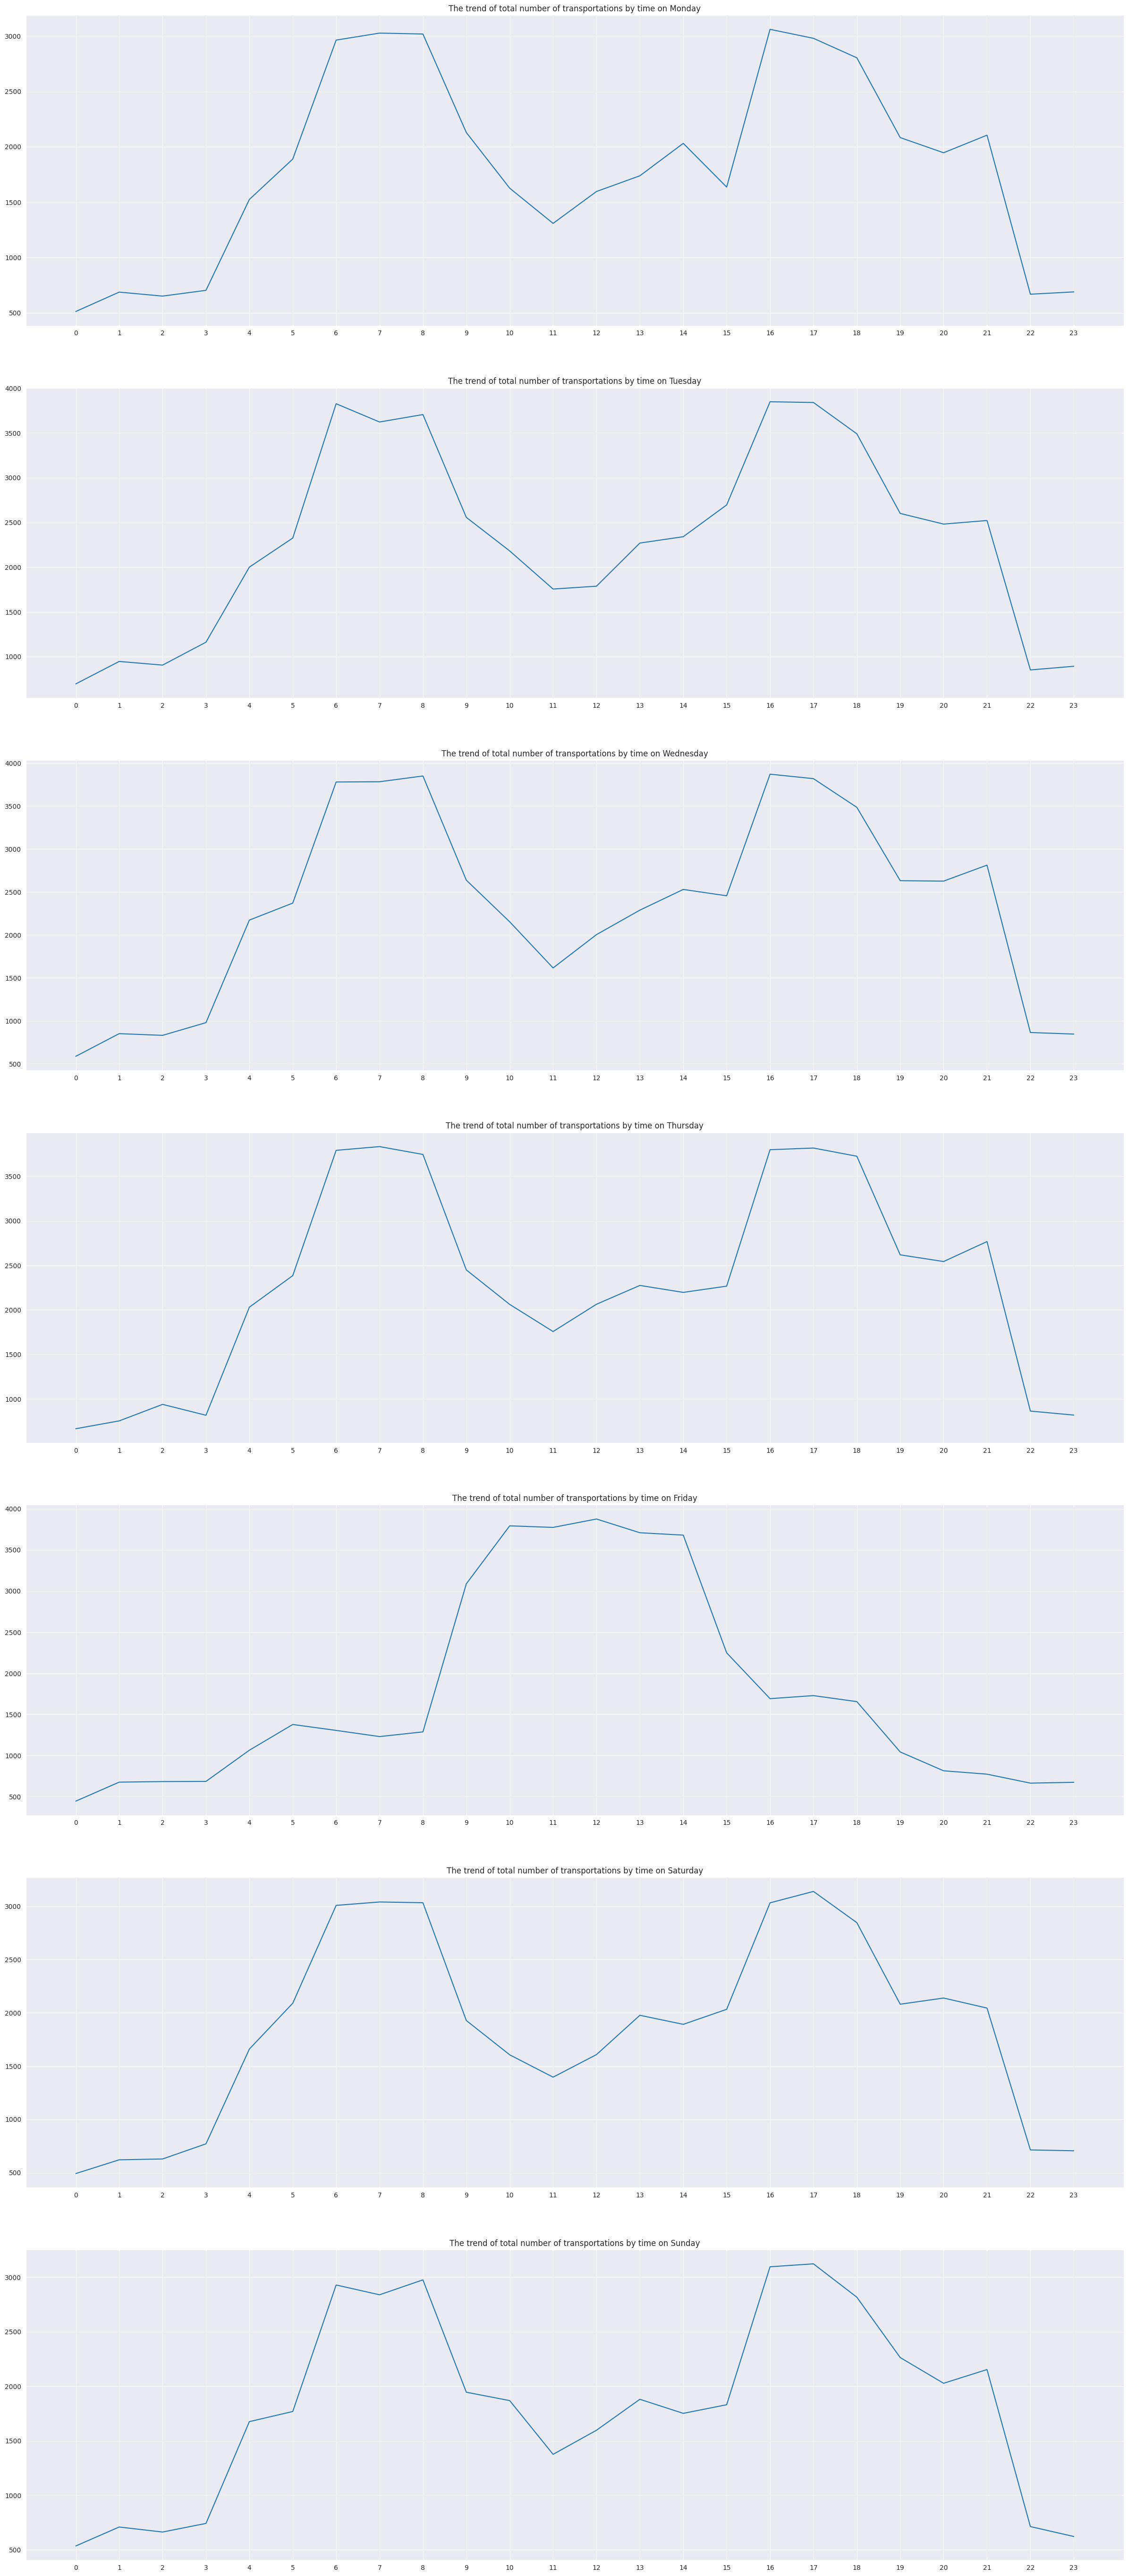

In [15]:
# Visualising
sns.set_style("darkgrid")

fig, axs = plt.subplots(7,1, figsize =(30, 70))
i = 0

for day in grouped_df2["Day of the week"].unique():
    data = grouped_df2.loc[grouped_df2["Day of the week"] == day].groupby("Hour", as_index=False).agg('sum')
     
    axs[i].plot(data["Hour"], data["Total"])
    axs[i].set_xticks(np.arange(0, 24, 1))
    
    axs[i].set_title(f"The trend of total number of transportations by time on {day}")
    i += 1

plt.show()

<div class="alert alert-block alert-info" style="font-size:15px; font-family:verdana; line-height: 1.7em;">
   As it can be seen, the peak hours happened in the morning (6:00 to 8:00) and the evening (16:00 to 18:00) when people go to work and return home from work apart from Friday.

The trends of all days apart from Friday were quite similar to each other.
</div>
